In [1]:
import warnings

import numpy as np
import pandas as pd

from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

# hide warnings
warnings.filterwarnings("ignore")

In [2]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

## Basic Forecasting Workflow

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

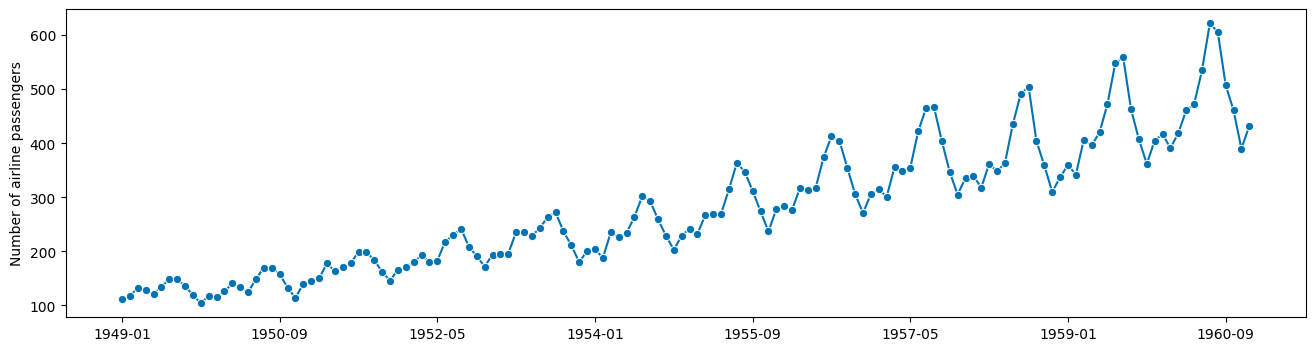

In [3]:
y = load_airline()

# plotting for visualization
plot_series(y)


In [4]:
y.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', length=144)

In [5]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12) # sp = seasonal periodicity 

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

""" 
* Some forecasters require the forecast horizon, fh 

# step 4: fitting the forecaster
forecaster.fit(y, fh=fh)

# step 5: querying predictions
y_pred = forecaster.predict()

"""

' \n* Some forecasters require the forecast horizon, fh \n\n# step 4: fitting the forecaster\nforecaster.fit(y, fh=fh)\n\n# step 5: querying predictions\ny_pred = forecaster.predict()\n\n'

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

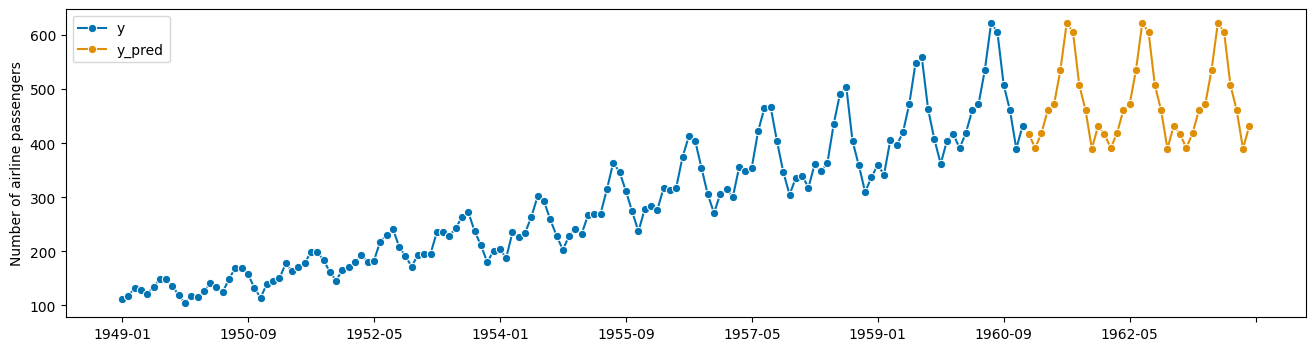

In [6]:
# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

Exogenous Data

In [7]:
# we create some dummy exogeneous data
X = pd.DataFrame(index=y.index)
X

""
1949-01
1949-02
1949-03
1949-04
1949-05
...
1960-08
1960-09
1960-10
1960-11


### Multivariate

# Classification 

In [8]:
import matplotlib.pyplot as plt

from sktime.datasets import (
    load_arrow_head,
    load_basic_motions,
    load_japanese_vowels,
    load_plaid,
)

(36, 1, 251) (36,) (175, 1, 251) (175,)


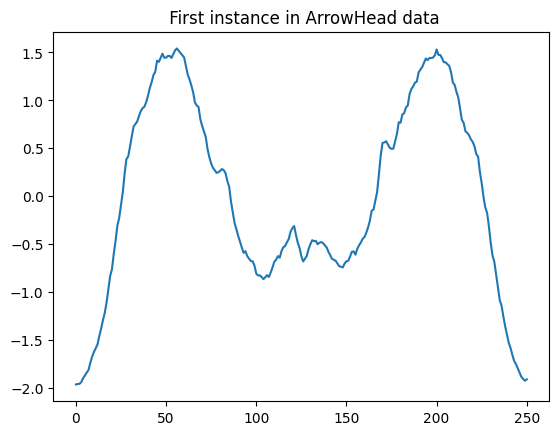

In [10]:
 # Load all arrow head
arrow_X, arrow_y = load_arrow_head(return_type="numpy3d")
# Load default train/test splits from sktime/datasets/data
arrow_train_X, arrow_train_y = load_arrow_head(split="train", return_type="numpy3d")
arrow_test_X, arrow_test_y = load_arrow_head(split="test", return_type="numpy3d")
print(arrow_train_X.shape, arrow_train_y.shape, arrow_test_X.shape, arrow_test_y.shape)
plt.title(" First instance in ArrowHead data")
plt.plot(arrow_train_X[0, 0])


In [13]:
# Load arrow head dataset, pandas multiindex format, also accepted by sktime classifiers
arrow_train_X, arrow_train_y = load_arrow_head(
    split="train", return_type="pd-multiindex"
)
arrow_test_X, arrow_test_y = load_arrow_head(split="test", return_type="pd-multiindex")
print(arrow_train_X.head())

                         dim_0
instances timepoints          
0         0          -1.963009
          1          -1.957825
          2          -1.956145
          3          -1.938289
          4          -1.896657


In [14]:
arrow_train_X

dim_0
instances timepoints          
0         0          -1.963009
          1          -1.957825
          2          -1.956145
          3          -1.938289
          4          -1.896657
...                        ...
35        246        -1.717157
          247        -1.759057
          248        -1.796549
          249        -1.798544
          250        -1.801050

[9036 rows x 1 columns]

In [15]:
# Load arrow head dataset in nested pandas format, also accepted by sktime classifiers
arrow_train_X, arrow_train_y = load_arrow_head(split="train", return_type="nested_univ")
arrow_test_X, arrow_test_y = load_arrow_head(split="test", return_type="nested_univ")
arrow_train_X.iloc[:5]

,dim_0
0,0 -1.963009 1 -1.957825 2 -1.95614...
1,0 -1.774571 1 -1.774036 2 -1.77658...
2,0 -1.866021 1 -1.841991 2 -1.83502...
3,0 -2.073758 1 -2.073301 2 -2.04460...
4,0 -1.746255 1 -1.741263 2 -1.72274...


In [16]:
arrow_train_X

,dim_0
0,0 -1.963009 1 -1.957825 2 -1.95614...
1,0 -1.774571 1 -1.774036 2 -1.77658...
2,0 -1.866021 1 -1.841991 2 -1.83502...
3,0 -2.073758 1 -2.073301 2 -2.04460...
4,0 -1.746255 1 -1.741263 2 -1.72274...
5,0 -1.982806 1 -1.978861 2 -1.93733...
6,0 -2.083023 1 -2.092058 2 -2.04946...
7,0 -1.633596 1 -1.643175 2 -1.61367...
8,0 -1.717013 1 -1.728059 2 -1.68330...
9,0 -2.245295 1 -2.223850 2 -2.17187...


<class 'pandas.core.frame.DataFrame'>


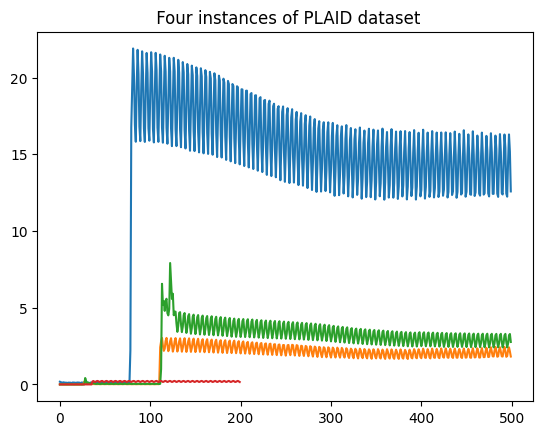

In [17]:
plaid_X, plaid_y = load_plaid()
print(type(plaid_X))

plt.title(" Four instances of PLAID dataset")
plt.plot(plaid_X.iloc[0, 0])
plt.plot(plaid_X.iloc[1, 0])
plt.plot(plaid_X.iloc[2, 0])
plt.plot(plaid_X.iloc[3, 0])
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(n_estimators=100)
arrow_train_X_2d, arrow_train_y_2d = load_arrow_head(
    split="train", return_type="numpy2d"
)
arrow_test_X_2d, arrow_test_y_2d = load_arrow_head(split="test", return_type="numpy2d")
classifier.fit(arrow_train_X_2d, arrow_train_y_2d)
y_pred = classifier.predict(arrow_test_X_2d)
accuracy_score(arrow_test_y_2d, y_pred)

0.7028571428571428

In [20]:
from sktime.classification.kernel_based import RocketClassifier

rocket = RocketClassifier()
rocket.fit(arrow_train_X, arrow_train_y)
y_pred = rocket.predict(arrow_test_X)
accuracy_score(arrow_test_y, y_pred)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


0.8114285714285714